In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from MDAnalysis.analysis import rms

In [2]:
mda.__version__

'2.3.0'

In [3]:
# 2_2dri-RIP

In [4]:
u = mda.Universe( '../2_2dri-RIP_MD/2_2dri-RIP_nowat.gro','../2_2dri-RIP_MD/2_2dri-RIP_nowat.xtc', format='XTC')

In [5]:
top_file_1 = '../2_2dri-RIP_MD/2_2dri-RIP_nowat.gro'
xtc_file_1 = '../2_2dri-RIP_MD/2_2dri-RIP_nowat.xtc'
u_1 = mda.Universe(top_file_1, xtc_file_1)

In [6]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=['protein','resname RIP'],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()




In [7]:
R.rmsd

/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


array([[0.00000000e+00, 1.00000000e+04, 7.33121313e-07, 8.46665881e-08,
        0.00000000e+00],
       [1.00000000e+00, 1.00100000e+04, 6.01665931e-01, 8.75437604e-01,
        7.93172299e-01],
       [2.00000000e+00, 1.00200000e+04, 6.12037223e-01, 9.02540617e-01,
        5.55958050e-01],
       ...,
       [4.99980000e+04, 5.09980000e+05, 1.15256996e+00, 1.95679141e+00,
        3.90446627e-01],
       [4.99990000e+04, 5.09990000e+05, 1.20203598e+00, 2.01449356e+00,
        3.72727868e-01],
       [5.00000000e+04, 5.10000000e+05, 1.12343961e+00, 1.92234175e+00,
        3.15757480e-01]])

In [8]:
df = pd.DataFrame(R.results.rmsd,
                  columns=['Frame', 'Time (ps)',
                           'Backbone', 'Protein', 'RIP'])


In [9]:
df

,Frame,Time (ps),Backbone,Protein,RIP
0,0.0,10000.0,7.331213e-07,8.466659e-08,0.000000
1,1.0,10010.0,6.016659e-01,8.754376e-01,0.793172
2,2.0,10020.0,6.120372e-01,9.025406e-01,0.555958
3,3.0,10030.0,6.347026e-01,1.003627e+00,0.397226
4,4.0,10040.0,7.013712e-01,1.046583e+00,0.340104
...,...,...,...,...,...
49996,49996.0,509960.0,1.256147e+00,2.037962e+00,0.359606
49997,49997.0,509970.0,1.175141e+00,1.987871e+00,0.506313
49998,49998.0,509980.0,1.152570e+00,1.956791e+00,0.390447
49999,49999.0,509990.0,1.202036e+00,2.014494e+00,0.372728


Text(0, 0.5, 'RMSD ($\\AA$)')

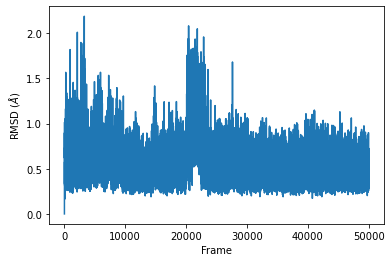

In [11]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(x='Frame', y='RIP', data=df.iloc[:,:], ax=ax)
ax.set_ylabel(r'RMSD ($\AA$)')

Text(0, 0.5, 'RMSD ($\\AA$)')

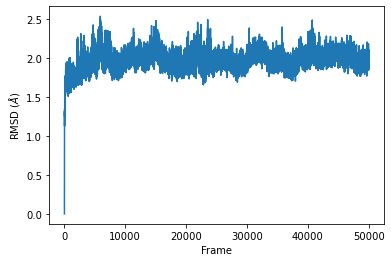

In [12]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(x='Frame', y='Protein', data=df, ax=ax)
ax.set_ylabel(r'RMSD ($\AA$)')

In [25]:
#apo_1urp
u = mda.Universe( '../../MD-CL-7-1/1_apo_1urp_MD/1_apo_1urp_nowat.gro','../../MD-CL-7-1/1_apo_1urp_MD/1_apo_1urp_nowat.xtc')
u_ref = mda.Universe( '../../MD-CL-7-1/1_apo_1urp_MD/1_apo_1urp_nowat.gro')
R = rms.RMSD(u,  # universe to align
             u_ref,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=['protein'],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()


df = pd.DataFrame(R.results.rmsd,
                  columns=['Frame', 'Time (ps)',
                           'Backbone', 'Protein'])


Text(0, 0.5, 'RMSD ($\\AA$)')

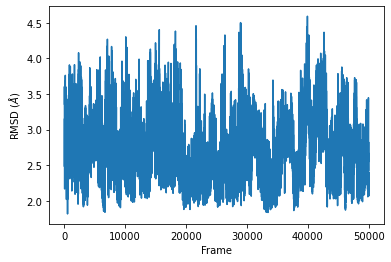

In [26]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(x='Frame', y='Protein', data=df, ax=ax)
ax.set_ylabel(r'RMSD ($\AA$)')

In [19]:
# apo_2dri
u = mda.Universe( '../../MD-CL-7-3/1_apo_2dri_MD/1_apo_2dri_nowat.gro','../../MD-CL-7-3/1_apo_2dri_MD/1_apo_2dri_nowat.xtc', format='XTC')
#u_ref = mda.Universe('../../MD-CL-7-1/1_apo_1urp_nowat.gro')
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=['protein'],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()


df = pd.DataFrame(R.results.rmsd,
                  columns=['Frame', 'Time (ps)',
                           'Backbone', 'Protein'])


SelectionError: Group selection 0: ['protein'] | ['protein']: Reference and trajectory atom selections do not contain the same number of atoms: N_ref=4059, N_traj=4060

Text(0, 0.5, 'RMSD ($\\AA$)')

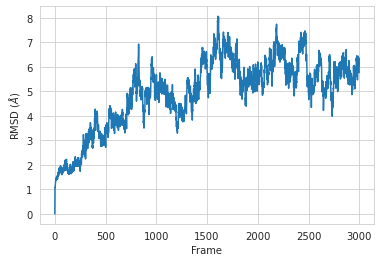

In [18]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(x='Frame', y='Protein', data=df.iloc[:3000,:], ax=ax)
ax.set_ylabel(r'RMSD ($\AA$)')